# 1. Importación de datos



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [3]:
# local
# path1 = r'\CienciaDatos_Oracle_Challenge\data\tienda_1 .csv'
# path2 = r'CienciaDatos_Oracle_Challenge\data\tienda_2.csv'
# path3 = r'CienciaDatos_Oracle_Challenge\data\tienda_3.csv'
# path4 = r'CienciaDatos_Oracle_Challenge\data\tienda_4.csv'

# tienda1 = pd.read_csv(path1)
# tienda2 = pd.read_csv(path2)
# tienda3 = pd.read_csv(path3)
# tienda4 = pd.read_csv(path4)

# tienda1.head()

# 2. Limpieza de los datos.



Revisaremos si las cuatro bases de datos tienen las mismas columnas.

In [4]:
def misma_columnas(*cols):
    """
    Verifica si multiples DataFrames tienen las mismas columnas antes de realizar operaciones.
    
    Valida la estructura de datos comparando los nombres de columnas entre diferentes
    DataFrames. Esencial para asegurar consistencia antes de merges, concats o analisis
    combinados.

    Parameters
    ----------
    *cols : multiple list-like
        Listas de nombres de columnas de cada DataFrame a comparar.

    Returns
    -------
    bool
        True si todos los DataFrames tienen exactamente las mismas columnas.
        False si hay diferencias en los nombres o cantidad de columnas.

    Example
    -------
    >>> # Validar estructura antes de concatenar multiples tiendas
    >>> es_valido = misma_columnas(tienda1.columns, tienda2.columns, tienda3.columns)
    >>> if es_valido:
    >>>     df_consolidado = pd.concat([tienda1, tienda2, tienda3])
    """
    # Convertir cada lista de columnas a set para comparacion sin orden
    sets = [set(lista) for lista in cols]
    
    # Verificar que todos los sets sean iguales al primero
    return all(s == sets[0] for s in sets[1:])

# Validacion de estructura de datos
comparacion = misma_columnas(
    list(tienda1.columns), 
    list(tienda2.columns), 
    list(tienda3.columns), 
    list(tienda4.columns)
)

if comparacion:
    print('Las 4 bases tienen las mismas columnas')
else:
    print('Las bases tienen estructuras diferentes')

Las 4 bases tienen las mismas columnas


Revisamos si las columnas tienen el mismo tipo de datos

In [5]:
print(tienda1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2359 non-null   object 
 1   Categoría del Producto  2359 non-null   object 
 2   Precio                  2359 non-null   float64
 3   Costo de envío          2359 non-null   float64
 4   Fecha de Compra         2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Lugar de Compra         2359 non-null   object 
 7   Calificación            2359 non-null   int64  
 8   Método de pago          2359 non-null   object 
 9   Cantidad de cuotas      2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB
None


In [6]:
def mismo_dtype(*df):
    """
    Verifica si multiples DataFrames tienen los mismos tipos de datos en sus columnas.
    
    Valida la consistencia en tipos de datos (dtypes) entre DataFrames para asegurar
    compatibilidad en operaciones de merge, concat y analisis combinados.

    Parameters
    ----------
    *df : multiple pandas.DataFrame
        DataFrames cuyos tipos de datos se compararan.

    Returns
    -------
    bool
        True si todos los DataFrames tienen los mismos tipos de datos por columna.
        False si hay diferencias en los tipos de datos.

    Example
    -------
    >>> # Validar tipos de datos antes de consolidacion
    >>> es_consistente = mismo_dtype(tienda1, tienda2, tienda3)
    >>> if es_consistente:
    >>>     df_unificado = pd.concat([tienda1, tienda2, tienda3])
    """
    # Extraer tipos de datos de cada DataFrame
    lista_dtypes = [dataframe.dtypes.tolist() for dataframe in df]
    
    # Verificar consistencia entre todos los DataFrames
    condicional = all(s == lista_dtypes[0] for s in lista_dtypes[1:])
    
    if condicional:
        print('Todos los DataFrames tienen los mismos tipos de datos')
    else:
        print('Los DataFrames tienen tipos de datos diferentes')
        # Mostrar diferencias especificas
        for i, dataframe in enumerate(df):
            print(f"  DataFrame {i+1}: {dataframe.dtypes.tolist()}")
    
    return condicional

# Validacion de tipos de datos
es_consistente = mismo_dtype(tienda1, tienda2, tienda3, tienda4)


Todos los DataFrames tienen los mismos tipos de datos


Revisamos si las bases de datos tienen valores nulos

In [7]:
def valores_nulos(*df):
    """
    Analiza y reporta valores nulos para multiples DataFrames.
    
    Proporciona un resumen rapido de missing values por columna en cada DataFrame,
    facilitando la identificacion de problemas de calidad de datos en datasets multiples.

    Parameters
    ----------
    *df : multiple pandas.DataFrame
        DataFrames a analizar para detectar valores nulos.

    Returns
    -------
    None
        Imprime un reporte detallado de valores nulos por DataFrame y columna.

    Example
    -------
    >>> # Analisis rapido de calidad de datos en multiples fuentes
    >>> valores_nulos(ventas_2023, ventas_2024, inventario)
    """
    print("Analisis de valores nulos por dataframe")
    print("=" * 50)
    
    for n, dataframe in enumerate(df, 1): 
        print(f'\nDataFrame {n}')
        print(f"Forma: {dataframe.shape[0]} filas × {dataframe.shape[1]} columnas")
        
        # Calcular valores nulos
        nulos_por_columna = dataframe.isnull().sum()
        total_nulos = nulos_por_columna.sum()
        porcentaje_nulos = (total_nulos / (dataframe.shape[0] * dataframe.shape[1])) * 100
        
        print(f"Total valores nulos: {total_nulos} ({porcentaje_nulos:.1f}% del dataset)")
        
        # Mostrar solo columnas con valores nulos
        columnas_con_nulos = nulos_por_columna[nulos_por_columna > 0]
        if not columnas_con_nulos.empty:
            print("Columnas con valores nulos:")
            for columna, nulos in columnas_con_nulos.items():
                porcentaje_col = (nulos / dataframe.shape[0]) * 100
                print(f"   • {columna}: {nulos} nulos ({porcentaje_col:.1f}%)")
        else:
            print("No hay valores nulos en este DataFrame")
        
        print('─' * 50)

# Ejecutar analisis de calidad de datos
valores_nulos(tienda1, tienda2, tienda3, tienda4)

Analisis de valores nulos por dataframe

DataFrame 1
Forma: 2359 filas × 12 columnas
Total valores nulos: 0 (0.0% del dataset)
No hay valores nulos en este DataFrame
──────────────────────────────────────────────────

DataFrame 2
Forma: 2359 filas × 12 columnas
Total valores nulos: 0 (0.0% del dataset)
No hay valores nulos en este DataFrame
──────────────────────────────────────────────────

DataFrame 3
Forma: 2359 filas × 12 columnas
Total valores nulos: 0 (0.0% del dataset)
No hay valores nulos en este DataFrame
──────────────────────────────────────────────────

DataFrame 4
Forma: 2358 filas × 12 columnas
Total valores nulos: 0 (0.0% del dataset)
No hay valores nulos en este DataFrame
──────────────────────────────────────────────────


# 3. Análisis exploratorio

Para hacer este analisis vamos a hacer lo siguiente:
- Agregar una columna ``tienda`` en cada base datos correspondiente al numero de tienda
- concatenar las cuatro tiendas en un solo dataframe

In [8]:
# Creamos una lista con los df de las tiendas
tiendas = [tienda1,tienda2,tienda3,tienda4]

#Creamos una columna tienda con el numero correspondiente a la tienda
for i,df in enumerate(tiendas,1):
    df['tienda'] = i

df_tiendas = pd.concat(tiendas,ignore_index=True)

In [9]:
#Cambiamos el formato de la columana de fechas por datetime
df_tiendas['Fecha de Compra'] = pd.to_datetime(
    df_tiendas['Fecha de Compra'], 
    format='%d/%m/%Y'
)

df_tiendas.to_csv('ventas_tiendas.csv')

In [10]:
df_tiendas.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,tienda
0,Asistente virtual,Electrónicos,164300.0,6900.0,2021-01-16,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,1
1,Mesa de comedor,Muebles,192300.0,8400.0,2022-05-18,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,1
2,Juego de mesa,Juguetes,209600.0,15900.0,2021-03-15,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,1
3,Microondas,Electrodomésticos,757500.0,41000.0,2022-05-03,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,1
4,Silla de oficina,Muebles,335200.0,20200.0,2020-11-07,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,1


In [11]:
df_tiendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9435 entries, 0 to 9434
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Producto                9435 non-null   object        
 1   Categoría del Producto  9435 non-null   object        
 2   Precio                  9435 non-null   float64       
 3   Costo de envío          9435 non-null   float64       
 4   Fecha de Compra         9435 non-null   datetime64[ns]
 5   Vendedor                9435 non-null   object        
 6   Lugar de Compra         9435 non-null   object        
 7   Calificación            9435 non-null   int64         
 8   Método de pago          9435 non-null   object        
 9   Cantidad de cuotas      9435 non-null   int64         
 10  lat                     9435 non-null   float64       
 11  lon                     9435 non-null   float64       
 12  tienda                  9435 non-null   int64   

In [12]:
df_tiendas.describe()

,Precio,Costo de envío,Calificación,Cantidad de cuotas,lat,lon,tienda
count,9.435000e+03,9435.000000,9435.000000,9435.000000,9435.000000,9435.000000,9435.000000
mean,4.667323e+05,24875.145734,4.014520,2.927398,5.428909,-74.760108,2.499841
std,5.903207e+05,31480.036346,1.390518,2.802776,2.355663,1.207155,1.118046
min,7.600000e+03,0.000000,1.000000,1.000000,-4.215280,-77.281110,1.000000
25%,5.520000e+04,3000.000000,3.000000,1.000000,4.609710,-75.563590,1.500000
50%,2.215000e+05,11700.000000,5.000000,1.000000,4.609710,-74.199040,2.000000
75%,6.633000e+05,34900.000000,5.000000,4.000000,6.251840,-74.081750,3.000000
max,2.977000e+06,162500.000000,5.000000,24.000000,11.544440,-67.923900,4.000000


## Histogramas

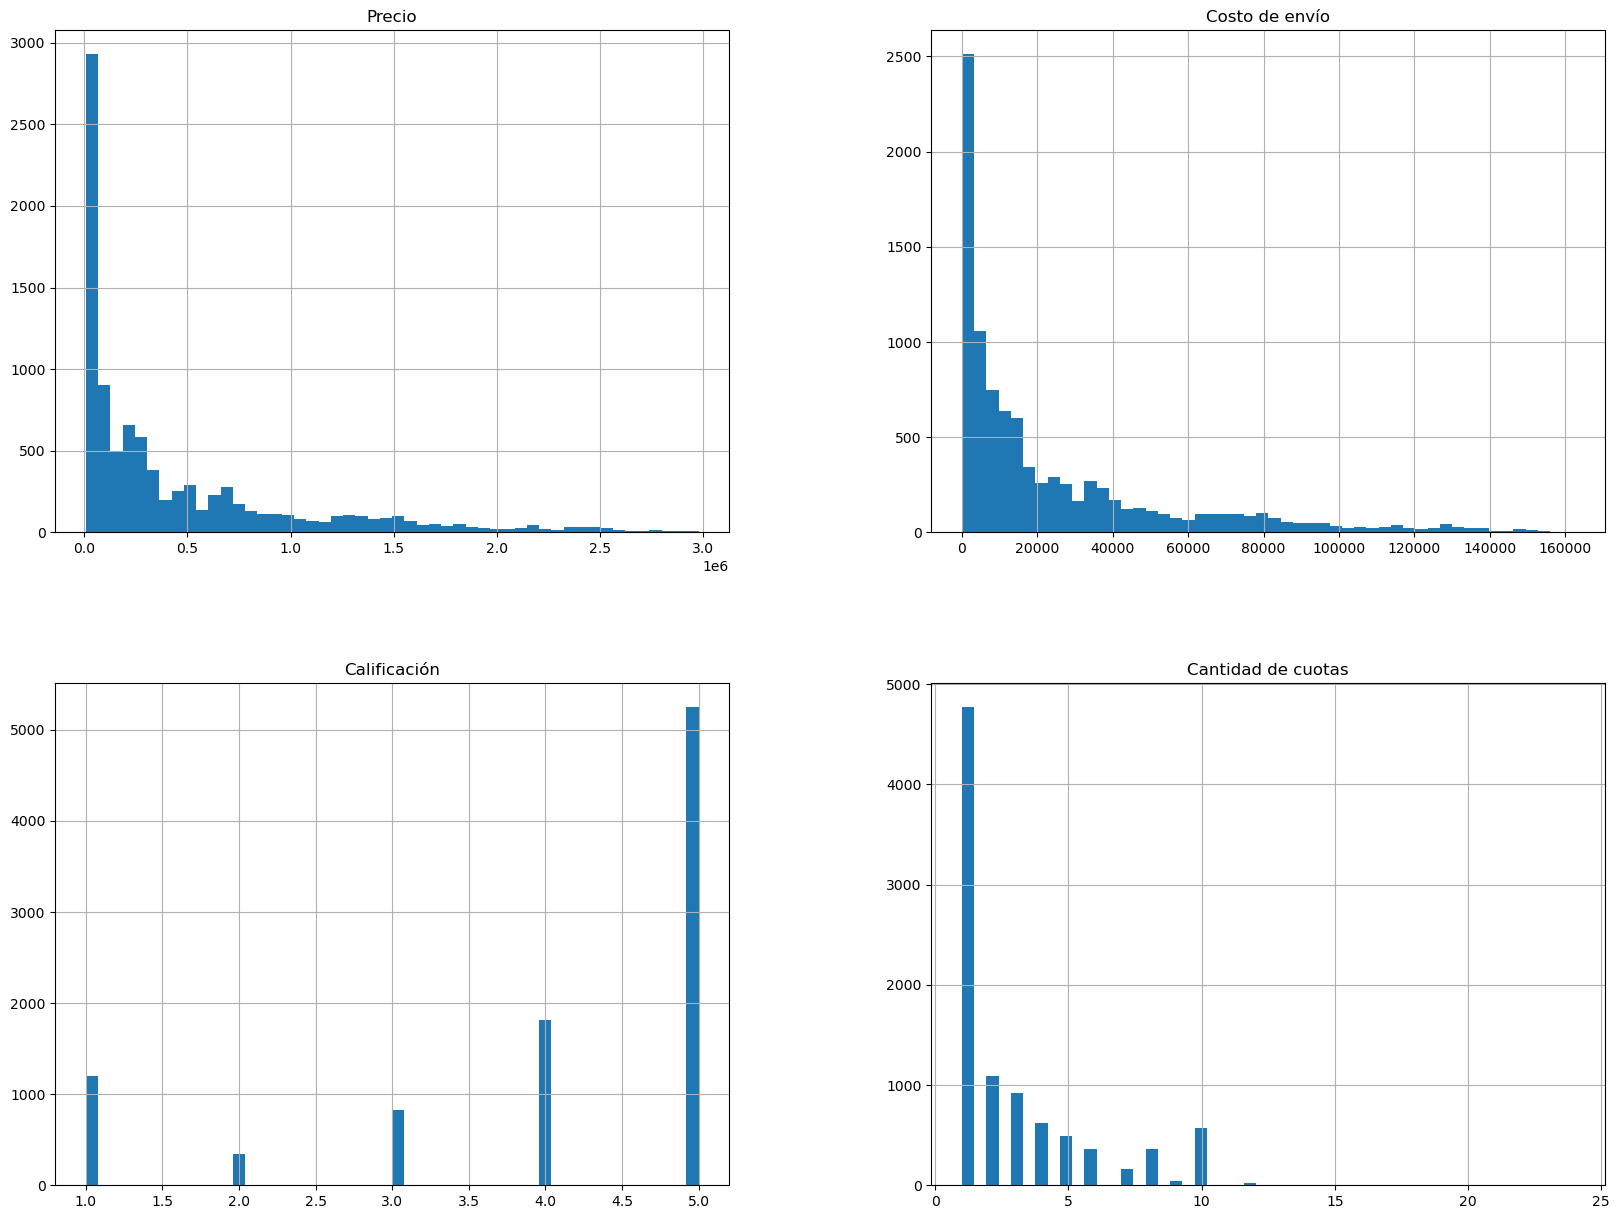

In [13]:
cols = ['Precio',	'Costo de envío',	'Calificación'	,'Cantidad de cuotas']
df_tiendas[cols].hist( bins=50,figsize=(20,15))
plt.show()

## Matriz de dispersión

<Figure size 1200x800 with 0 Axes>

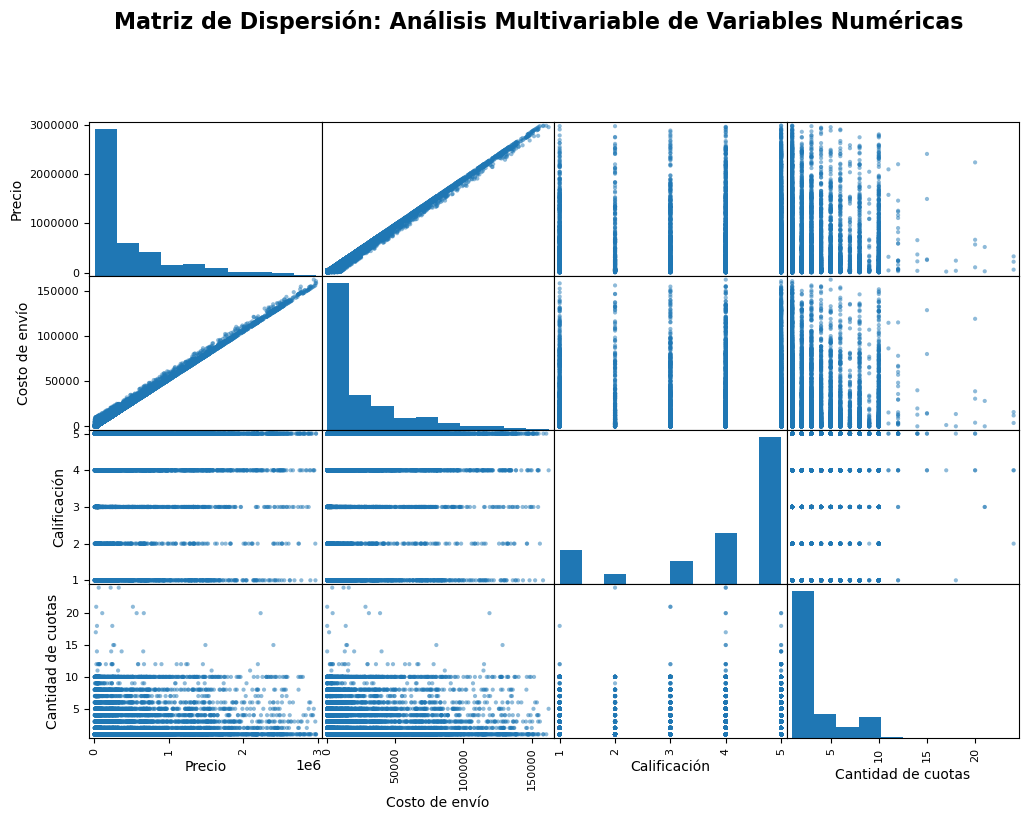

In [14]:
from pandas.plotting import scatter_matrix

plt.figure(figsize=(12, 8))
scatter_matrix(df_tiendas[cols], figsize=(12, 8))
plt.suptitle('Matriz de Dispersión: Análisis Multivariable de Variables Numéricas', 
             fontsize=16, fontweight='bold', y=1.02)
plt.show()

## Análisis de correlación Costo de envío - Precio

<Axes: title={'center': 'Relación: Costo de envío vs Precio (Centenas de miles)'}, xlabel='Costo de envío', ylabel='Precio_CentenasDe_Miles'>

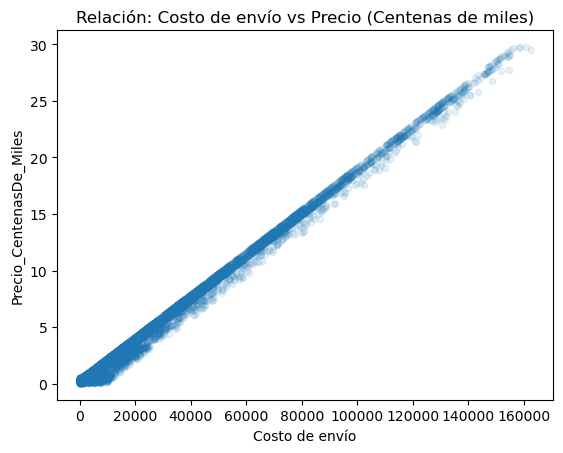

In [15]:
Costo_Precio = df_tiendas[["Costo de envío", "Precio"]].copy()
Costo_Precio['Precio_CentenasDe_Miles'] = Costo_Precio['Precio'] / 100_000

Costo_Precio.plot(kind="scatter", 
                  x="Costo de envío", 
                  y='Precio_CentenasDe_Miles', 
                  alpha=0.1,
                  title="Relación: Costo de envío vs Precio (Centenas de miles)")

In [16]:
from scipy.stats import pearsonr

correlacion, p_value = pearsonr(df_tiendas['Costo de envío'], df_tiendas['Precio'])
print(f"Correlación: {correlacion:.4f}")

Correlación: 0.9977


Existe una correlación del 99% entre el precio de los productos y su costo de envío, lo que indica que las tiendas ajustan los gastos de envío según el valor del artículo. Esto implica que los costos de envío pueden servir como indicador del segmento de precios en el que opera cada tienda.

## Análisis de relación entre el precio y la calificación del producto.

In [17]:
from scipy.stats import spearmanr, kruskal
import statsmodels.api as sm

# 1. Correlacion SPEARMAN
rho_s, p_s = spearmanr(df_tiendas['Precio'], df_tiendas['Calificación'])
print("===== SPEARMAN =====")
print(f"Correlación Spearman: {rho_s:.4f}")
print(f"P-valor: {p_s:.4f}\n")

# 2. Kruskal–Wallis: 
# ¿El precio cambia entre calificaciones?

# Agrupar precios por cada nivel de calificacion
grupos = [df_tiendas[df_tiendas['Calificación'] == c]['Precio'] for c in df_tiendas['Calificación'].unique()]

H, p_kw = kruskal(*grupos)
print("===== KRUSKAL–WALLIS =====")
print(f"Estadístico H: {H:.4f}")
print(f"P-valor: {p_kw:.4f}\n")



===== SPEARMAN =====
Correlación Spearman: -0.0021
P-valor: 0.8416

===== KRUSKAL–WALLIS =====
Estadístico H: 2.9075
P-valor: 0.5734



**Resumen**

*SPEARMAN:* No hay relación entre precio y calificación (ni positiva ni negativa)

*KRUSKAL–WALLIS:* El precio promedio es similar en todos los grupos de calificación

**Conclusion:**

La calificación del cliente no esta influenciada por el precio del producto.




# 4. Análisis de facturación

### Transacciones totales por tienda:


In [18]:
transaccionesTienda = pd.DataFrame({
    'Tienda': [1, 2, 3, 4],
    'NoTran': [tienda.shape[0] for tienda in tiendas]  # shape[0] para número de filas
})
transaccionesTienda

,Tienda,NoTran
0,1,2359
1,2,2359
2,3,2359
3,4,2358


#### Transacciones promedio por mes

Del resultado anterior podemos intuir que el promedio de transacciones mensual seran similares entre tiendas, sin embargo, se corrobora la hipotesis.

In [19]:
#Creamos columnas de periodo mensual
df_tiendas['mes'] = df_tiendas['Fecha de Compra'].dt.to_period('M')

# Promedio de transacciones mensuales por tienda
transacciones_mensuales = (
    df_tiendas
    .groupby(['tienda', 'mes'])
    .size()  # Cuenta el número de transacciones por grupo
    .reset_index(name='num_transacciones')
)

# Calculamos el promedio de transacciones por tienda
promedio_transacciones = (
    transacciones_mensuales
    .groupby('tienda')['num_transacciones']
    .mean()
    .round(3)  # Redondeamos a 2 decimales
    .reset_index()
    .rename(columns={'num_transacciones': 'promedio_transacciones_mensual'})
)

promedio_transacciones

,tienda,promedio_transacciones_mensual
0,1,60.487
1,2,60.487
2,3,60.487
3,4,60.462


## Resumen
En general podemos resumir la información de los promedios de las 4 tiendas:

| Métrica           | Valor Promedio |
|-------------------|---------------:|
| Costo de envío    |    $24,875.14  |
| Calificación      |          4/5   |
| Cantidad de cuotas|          3     |
| Transacciones  mensuales|          61     |


## Desarrollo de las ventas a lo largo del tiempo por tienda

In [20]:
ventas_mensuales = (
    df_tiendas
    .groupby(['tienda', 'mes'])['Precio']
    .sum()
    .div(1_000_000)          # division
    .reset_index()
    .rename(columns={'Precio': 'Ventas_Millones'})
)


ventas_mensuales['mes'] = ventas_mensuales['mes'].dt.to_timestamp()

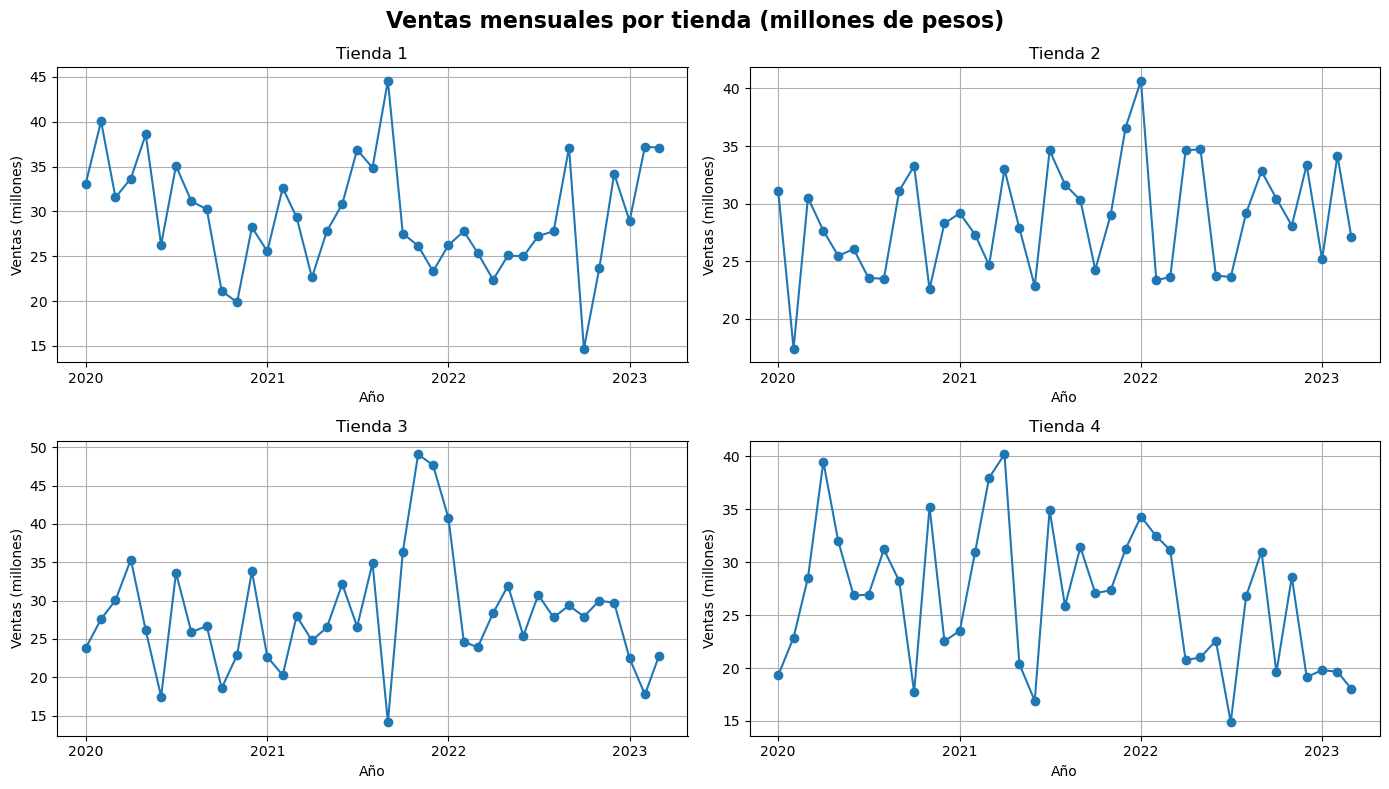

In [21]:
import matplotlib.dates as mdates

fig, axes = plt.subplots(2, 2, figsize=(14, 8), sharex=False)
axes = axes.flatten()

for ax, (tienda, df) in zip(axes, ventas_mensuales.groupby('tienda')):
    ax.plot(df['mes'], df['Ventas_Millones'], marker='o')
    ax.set_title(f'Tienda {tienda}')
    ax.set_xlabel('Año')
    ax.set_ylabel('Ventas (millones)')

    # Mostrar solo años en el eje X
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax.xaxis.set_major_locator(mdates.YearLocator())

    ax.grid(True)
plt.suptitle('Ventas mensuales por tienda (millones de pesos)', 
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()


Se implementará un modelo ARIMA para pronosticar las ventas futuras de las cuatro tiendas, con el objetivo de identificar cuál presenta la proyección más confiable y a la alza y así tomar mejores decisiones.

In [22]:
#Guardamos df para modelar con ARIMA
for tienda_num in ventas_mensuales['tienda'].unique():
    df_arima = ventas_mensuales[ventas_mensuales['tienda'] == tienda_num][['mes', 'Ventas_Millones']]
    df_arima = df_arima.sort_values('mes').reset_index(drop=True)
    df_arima.to_csv(f'serie_temporalMensual_tienda_{tienda_num}.csv', index=False)


In [23]:
# Creamos columnas de periodo semanal
df_tiendas['semana'] = df_tiendas['Fecha de Compra'].dt.to_period('W')

ventas_semanales = (
    df_tiendas
    .groupby(['tienda', 'semana'])['Precio']
    .sum()
    .div(1_000_000)          # Convertir a millones
    .reset_index()
    .rename(columns={'Precio': 'Ventas_Millones'})
)

# Convertir periodo semanal a timestamp para mejor manejo
ventas_semanales['semana'] = ventas_semanales['semana'].dt.to_timestamp()

In [24]:
#Guardamos df para modelar con ARIMA
for tienda_num in ventas_semanales['tienda'].unique():
    df_arima = ventas_semanales[ventas_semanales['tienda'] == tienda_num][['semana', 'Ventas_Millones']]
    df_arima = df_arima.sort_values('semana').reset_index(drop=True)
    df_arima.to_csv(f'serie_temporalsemanal_tienda_{tienda_num}.csv', index=False)

## Ventas totales por tienda 

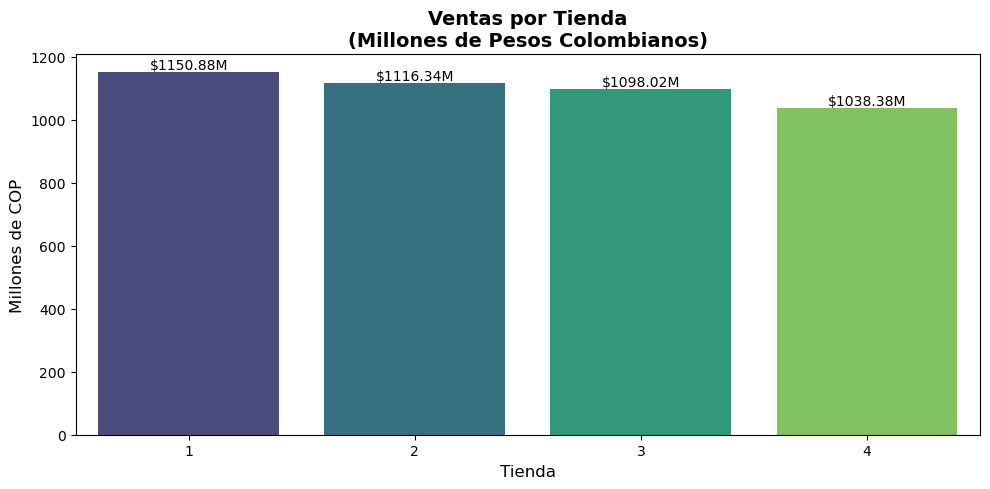

In [25]:
# Calcular ventas por tienda y convertir a millones
Ventas_tienda = (df_tiendas.groupby('tienda')['Precio'].sum() / 1_000_000).round(2)
ventas_df1 = Ventas_tienda.reset_index()
ventas_df1.columns = ['tienda', 'Ventas_Millones']
ventas_df1 = ventas_df1.sort_values(by='Ventas_Millones', ascending=False)

# Gráfico
plt.figure(figsize=(10, 5))
sns.barplot(data=ventas_df1, x='tienda', y='Ventas_Millones', palette='viridis')

plt.title('Ventas por Tienda\n(Millones de Pesos Colombianos)', fontsize=14, fontweight='bold')
plt.ylabel('Millones de COP', fontsize=12)
plt.xlabel('Tienda', fontsize=12)

# Etiquetas encima de cada barra
for i, v in enumerate(ventas_df1['Ventas_Millones']):
    plt.text(i, v + 0.05, f'${v:.2f}M', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# 5. Ventas por categoría

Asumiremos que los costos de envio los absorve el comprador y no el vendedor.

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
Ventas_categoria = (df_tiendas.groupby('Categoría del Producto')['Precio'].sum() / 1000000).round(2).sort_values()
ventas_df = Ventas_categoria.reset_index()
ventas_df.columns = ['Categoría', 'Ventas_Millones']

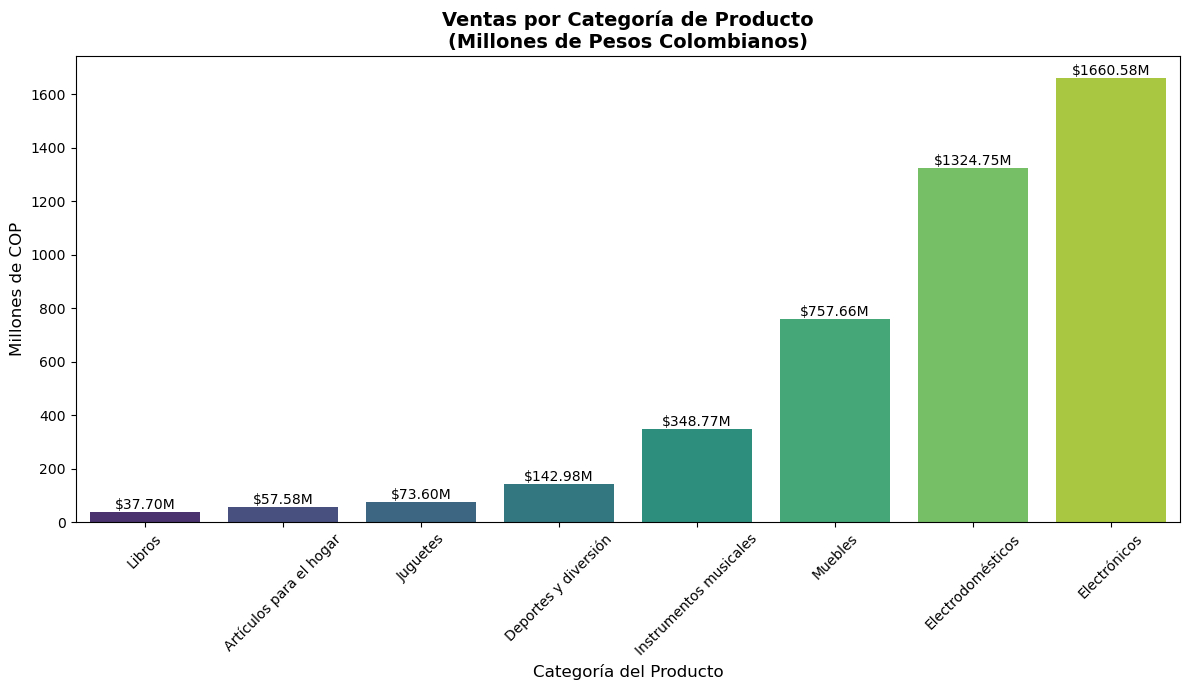

In [28]:
plt.figure(figsize=(12, 7))
sns.barplot(data=ventas_df, x='Categoría', y='Ventas_Millones', palette='viridis')
plt.title('Ventas por Categoría de Producto\n(Millones de Pesos Colombianos)', fontsize=14, fontweight='bold')
plt.ylabel('Millones de COP', fontsize=12)
plt.xlabel('Categoría del Producto', fontsize=12)
plt.xticks(rotation=45)

# Valores en las barras
for i, v in enumerate(ventas_df['Ventas_Millones']):
    plt.text(i, v + 0.1, f'${v:.2f}M', ha='center', va='bottom')

plt.tight_layout()
plt.show()

## Ventas por categoria y tienda

In [29]:
Ventas_categoriaTienda = (df_tiendas.groupby(['Categoría del Producto','tienda'])['Precio'].sum() / 1000000).round(2).sort_values()
Ventas_categoriaTienda
#ventasTienda_df = Ventas_categoriaTienda.reset_index()
#ventasTienda_df.columns = ['Categoría', 'Ventas_Millones']

Categoría del Producto   tienda
Libros                   1           8.78
                         4           9.32
                         3           9.50
                         2          10.09
Artículos para el hogar  1          12.70
                         2          14.75
                         3          15.06
                         4          15.07
Juguetes                 2          15.95
                         1          18.00
                         3          19.40
                         4          20.26
Deportes y diversión     4          33.35
                         2          34.74
                         3          35.59
                         1          39.29
Instrumentos musicales   4          75.10
                         3          77.38
                         1          91.30
                         2         104.99
Muebles                  2         176.43
                         1         187.63
                         4         192.53
  

In [30]:
def ventas_resume(df,name):
    name = (df.groupby('Categoría del Producto')['Precio'].sum() / 1000000).round(2).sort_values().reset_index()
    name.columns = ['Categoría', 'Ventas_Millones']
    return name

In [31]:
dfs = [ventas_resume(tienda,f'tienda{i}') for i,tienda in enumerate(tiendas,1)]

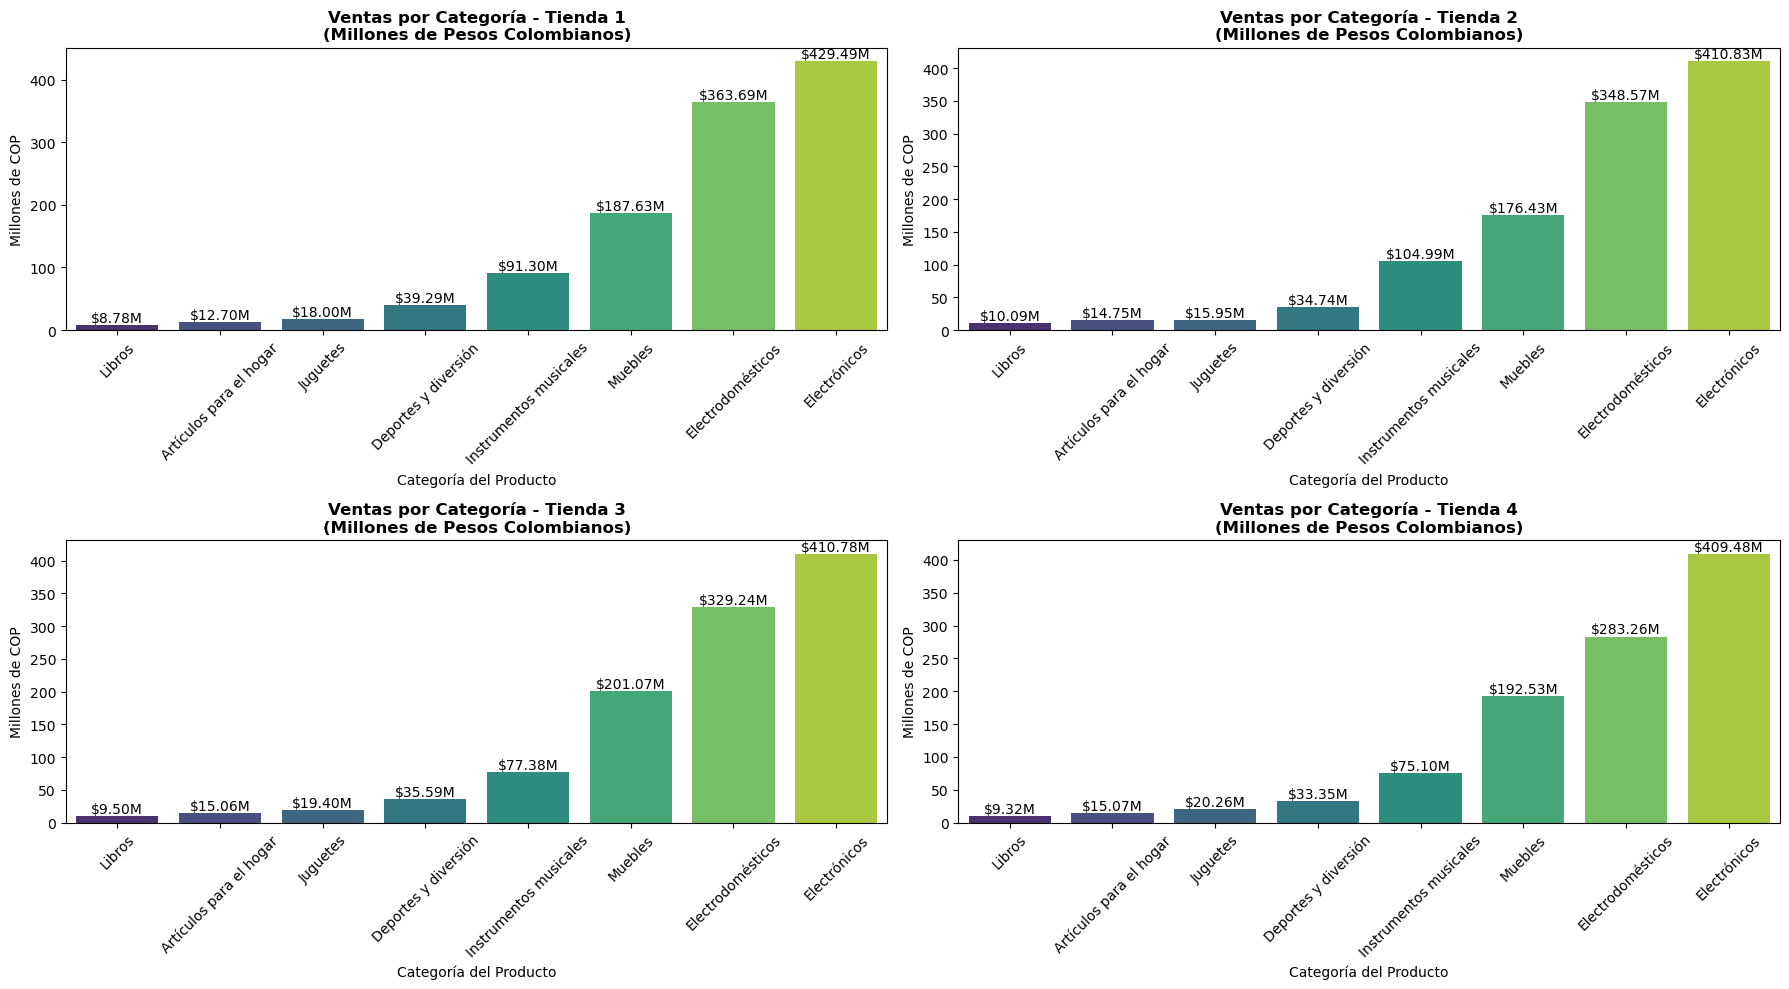

In [32]:
fig, axs = plt.subplots(2, 2, figsize=(18, 10))
axs = axs.flatten()

for i, (ax, df) in enumerate(zip(axs, dfs), 1):

    sns.barplot(data=df, x='Categoría', y='Ventas_Millones',
                palette='viridis', ax=ax)

    ax.set_title(
        f'Ventas por Categoría - Tienda {i}\n(Millones de Pesos Colombianos)',
        fontsize=12, fontweight='bold'
    )

    ax.set_ylabel('Millones de COP', fontsize=10)
    ax.set_xlabel('Categoría del Producto', fontsize=10)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

    # Añadir etiquetas encima de las barras
    for j, v in enumerate(df['Ventas_Millones']):
        ax.text(j, v + 0.1, f'${v:.2f}M', ha='center', va='bottom')

plt.tight_layout()
plt.show()


# 6. Calificación promedio de la tienda


In [33]:
calificacion_promedio = (
    df_tiendas
    .groupby(['tienda', 'mes'])['Calificación']
    .mean() 
    .reset_index()
)

calificacion_promedio['mes'] = calificacion_promedio['mes'].dt.to_timestamp()

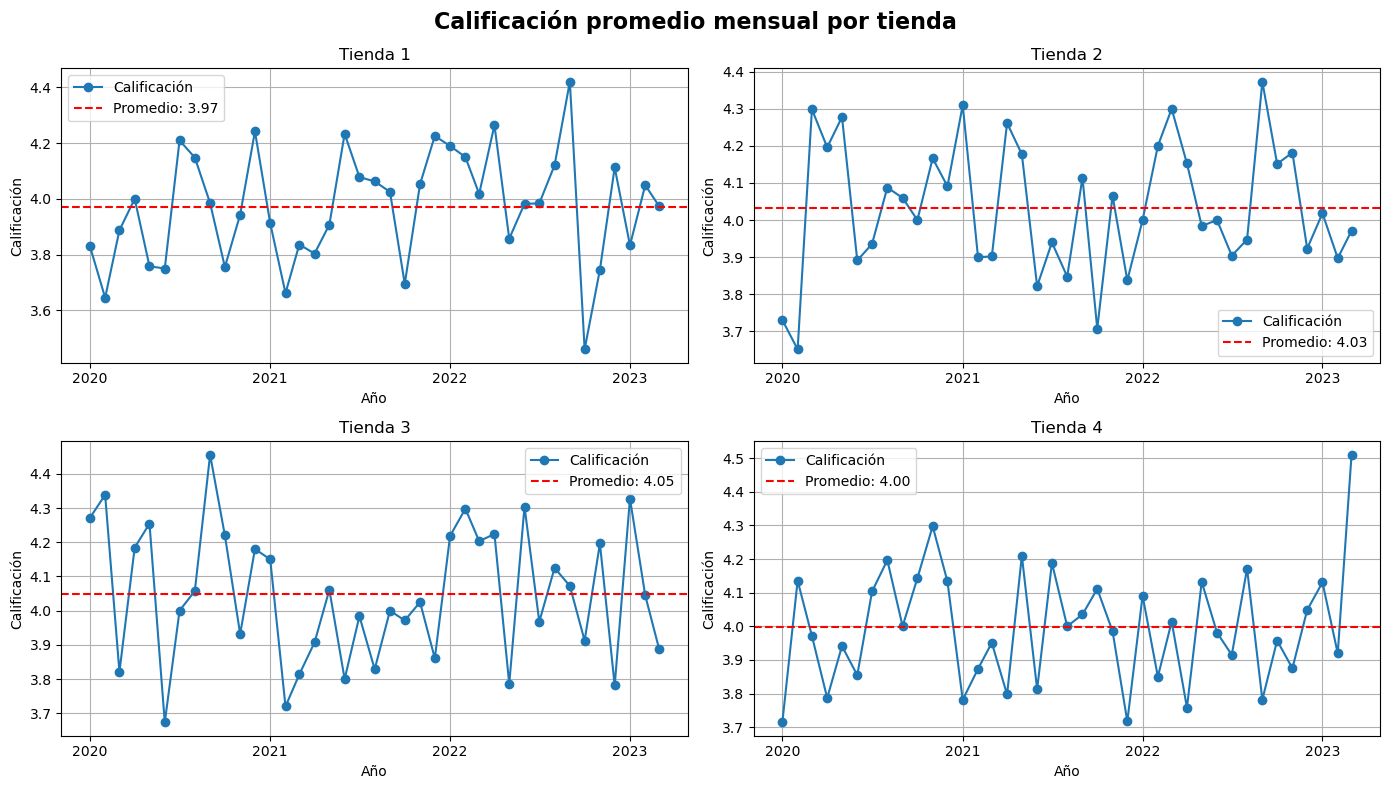

In [34]:
fig, axes = plt.subplots(2, 2, figsize=(14, 8), sharex=False)
axes = axes.flatten()

for ax, (tienda, df) in zip(axes, calificacion_promedio.groupby('tienda')):

    ax.plot(df['mes'], df['Calificación'], marker='o', label='Calificación')

    # Línea de promedio general de la tienda
    promedio = df['Calificación'].mean()
    ax.axhline(promedio, color='red', linestyle='--', linewidth=1.5,
               label=f'Promedio: {promedio:.2f}')

    ax.set_title(f'Tienda {tienda}')
    ax.set_xlabel('Año')
    ax.set_ylabel('Calificación')

    # Mostrar solo años
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax.xaxis.set_major_locator(mdates.YearLocator())

    ax.grid(True)
    ax.legend()
plt.suptitle('Calificación promedio mensual por tienda', 
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()


In [35]:
#Guardamos df para modelar con ARIMA
for tienda_num in calificacion_promedio['tienda'].unique():
    df_arima = calificacion_promedio[calificacion_promedio['tienda'] == tienda_num][['mes', 'Calificación']]
    df_arima = df_arima.sort_values('mes').reset_index(drop=True)
    df_arima.to_csv(f'serie_CalifMensual_tienda_{tienda_num}.csv', index=False)

En resumen se tiene que la tienda 3 es la que mejor calificacion promedio tiene con un promedio de 4, nada diferente al promedio general.

# 7. Productos más y menos vendidos

##  Análisis de unidades vendidas - TOP 10 Y BOTTOM 10

In [36]:
Ventas_unidades = (
    df_tiendas
    .groupby('Producto')
    .size()
    .reset_index(name='Unidades_Vendidas')
    .sort_values('Unidades_Vendidas', ascending=False)
)

VUTop10 = Ventas_unidades.head(10).copy()
VUBottom10 = Ventas_unidades.tail(10).copy()

## Análisis de ventas en millones - TOP 10 Y BOTTOM 10

In [37]:
productos_ventas = (
    df_tiendas
    .groupby('Producto')['Precio']
    .sum().div(1_000_000)
    .reset_index(name='Ventas_Millones')
    .sort_values('Ventas_Millones', ascending=False)
)

ProVentasTop10 = productos_ventas.head(10).copy()
ProVentasBottom10 = productos_ventas.tail(10).copy()

## Graficos

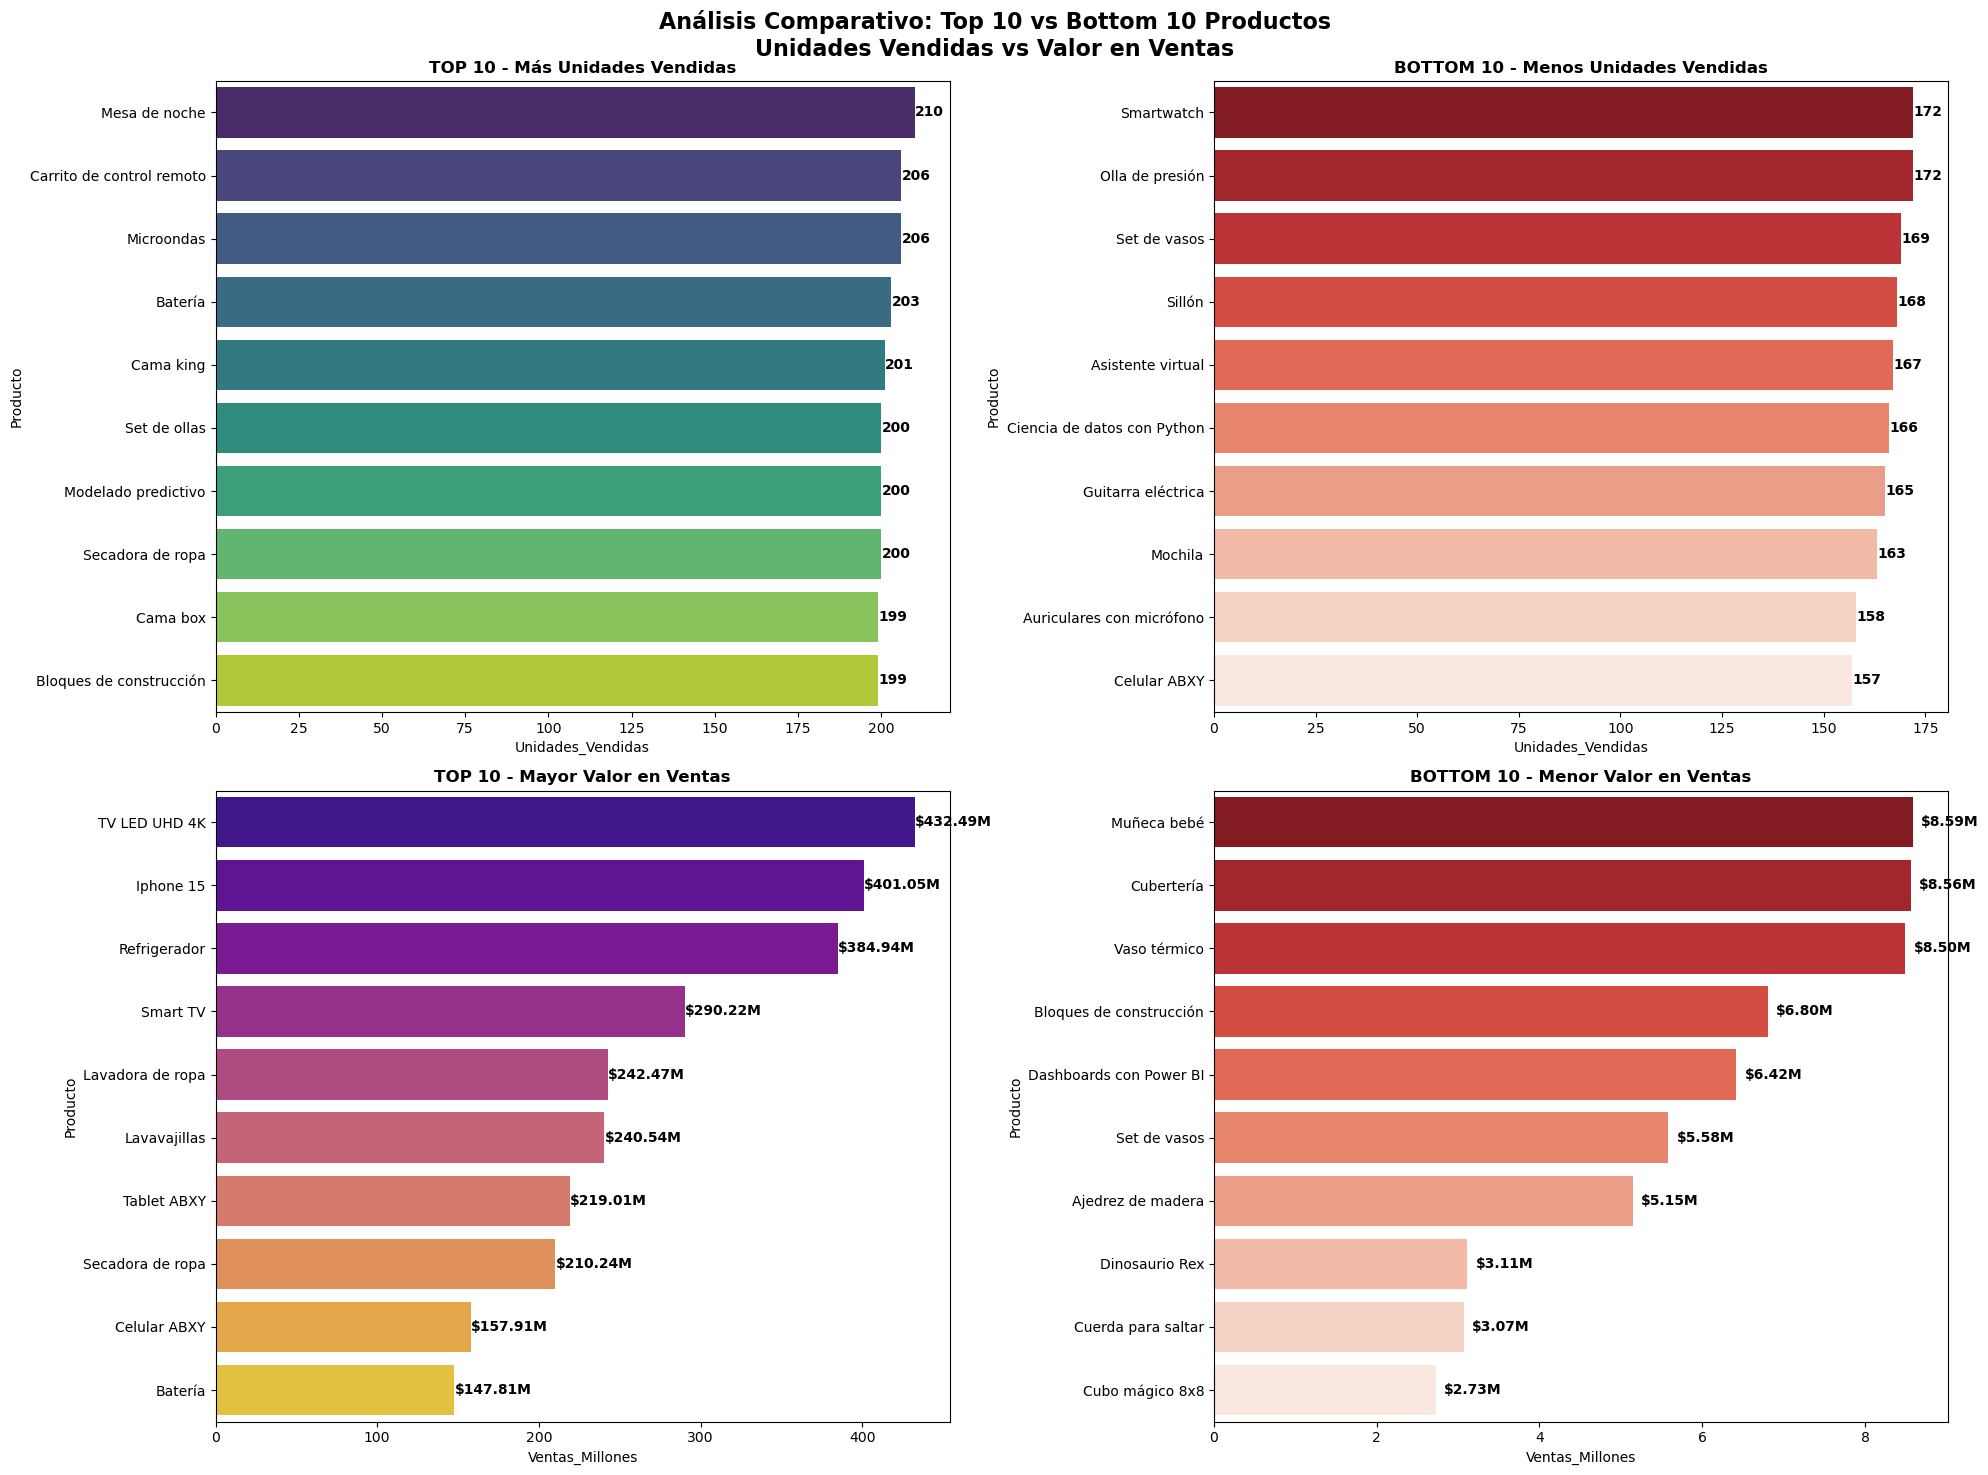

In [38]:
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

# 1. Top 10 Unidades
sns.barplot(data=VUTop10, x='Unidades_Vendidas', y='Producto', palette='viridis', ax=axes[0,0])
axes[0,0].set_title('TOP 10 - Más Unidades Vendidas', fontsize=12, fontweight='bold')
for i, v in enumerate(VUTop10['Unidades_Vendidas']):
    axes[0,0].text(v + 0.1, i, f'{v:.0f}', ha='left', va='center', fontweight='bold')

# 2. Bottom 10 Unidades
sns.barplot(data=VUBottom10, x='Unidades_Vendidas', y='Producto', palette='Reds_r', ax=axes[0,1])
axes[0,1].set_title('BOTTOM 10 - Menos Unidades Vendidas', fontsize=12, fontweight='bold')
for i, v in enumerate(VUBottom10['Unidades_Vendidas']):
    axes[0,1].text(v + 0.1, i, f'{v:.0f}', ha='left', va='center', fontweight='bold')

# 3. Top 10 Ventas Millones
sns.barplot(data=ProVentasTop10, x='Ventas_Millones', y='Producto', palette='plasma', ax=axes[1,0])
axes[1,0].set_title('TOP 10 - Mayor Valor en Ventas', fontsize=12, fontweight='bold')
for i, v in enumerate(ProVentasTop10['Ventas_Millones']):
    axes[1,0].text(v + 0.1, i, f'${v:.2f}M', ha='left', va='center', fontweight='bold')

# 4. Bottom 10 Ventas Millones
sns.barplot(data=ProVentasBottom10, x='Ventas_Millones', y='Producto', palette='Reds_r', ax=axes[1,1])
axes[1,1].set_title('BOTTOM 10 - Menor Valor en Ventas', fontsize=12, fontweight='bold')
for i, v in enumerate(ProVentasBottom10['Ventas_Millones']):
    axes[1,1].text(v + 0.1, i, f'${v:.2f}M', ha='left', va='center', fontweight='bold')

plt.suptitle('Análisis Comparativo: Top 10 vs Bottom 10 Productos\nUnidades Vendidas vs Valor en Ventas', 
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

## Productos con más ventas por tienda

## Ventas de productos en millones

In [39]:
def productos_top_bottom_resume(df, name, top_n=5):
    """
    Calcula el top 5 y bottom 5 de productos por ventas en millones
    """
    ventas = (df.groupby('Producto')['Precio']
              .sum()
              .div(1000000)
              .round(2)
              .sort_values(ascending=False)
              .reset_index())
    
    ventas.columns = ['Producto', 'Ventas_Millones']
    
    top5 = ventas.head(top_n)
    bottom5 = ventas.tail(top_n)
    
    return top5, bottom5

# Generar DataFrames para cada tienda
dfs_productos_completo = [productos_top_bottom_resume(tienda, f'tienda{i}') for i, tienda in enumerate(tiendas, 1)]

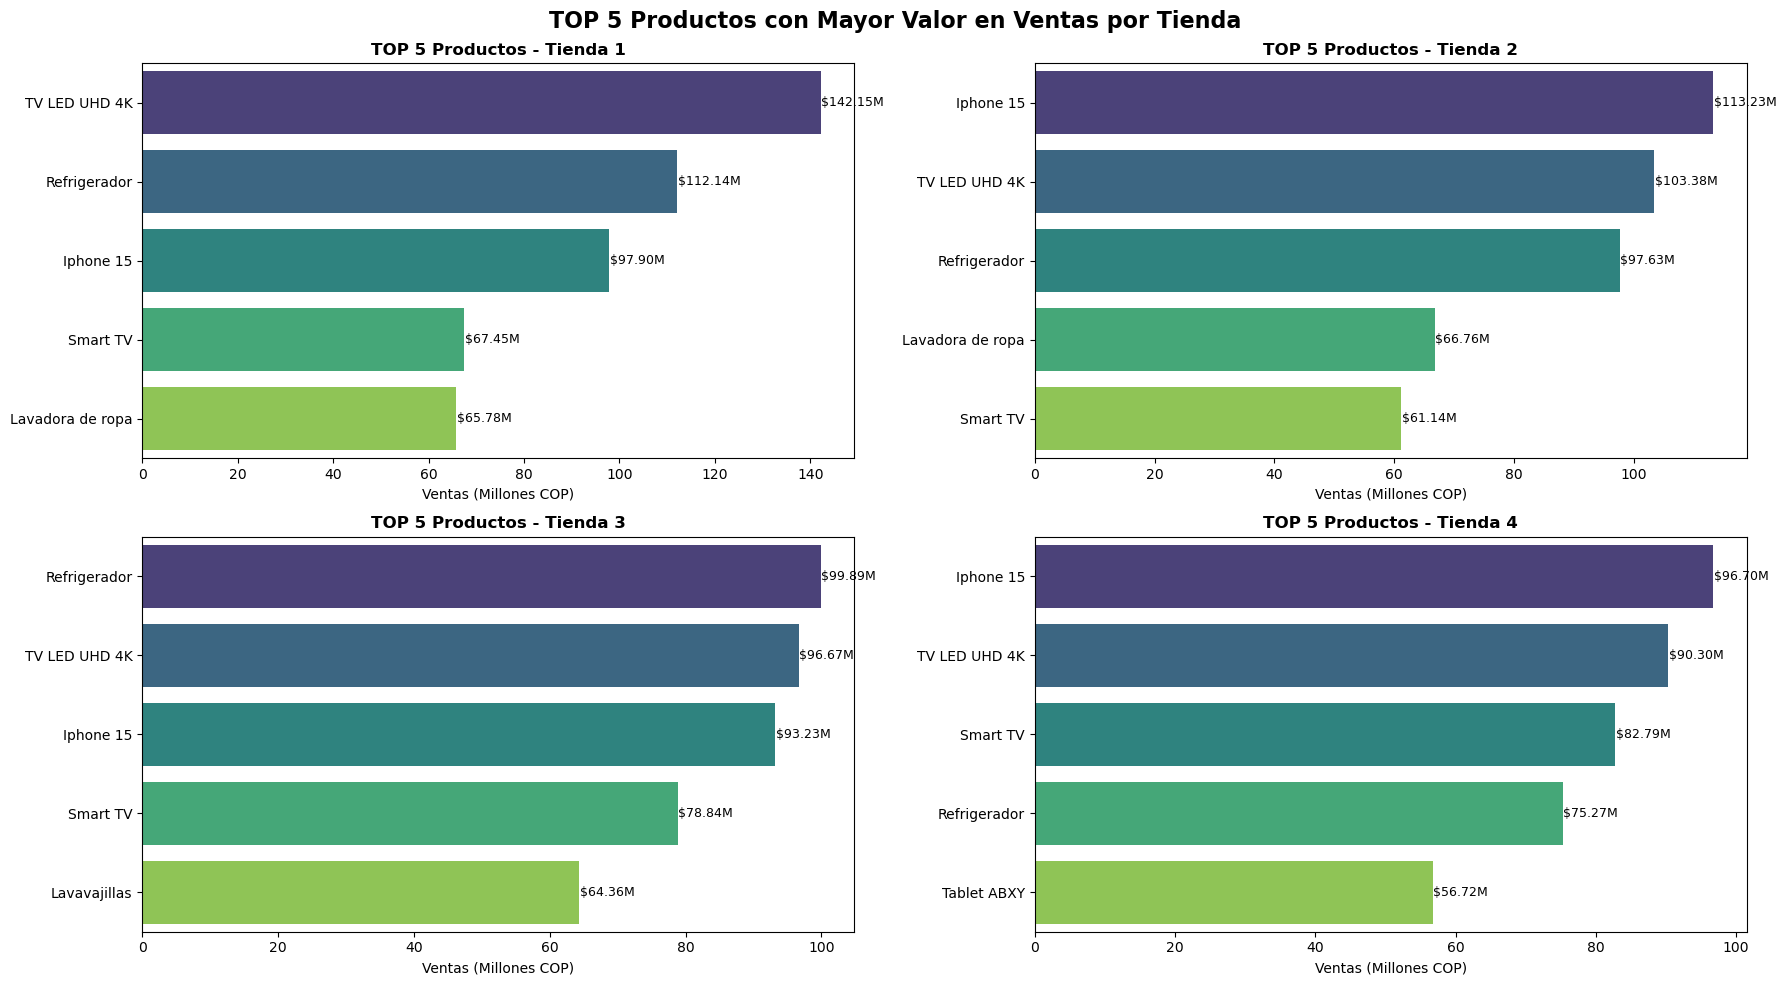

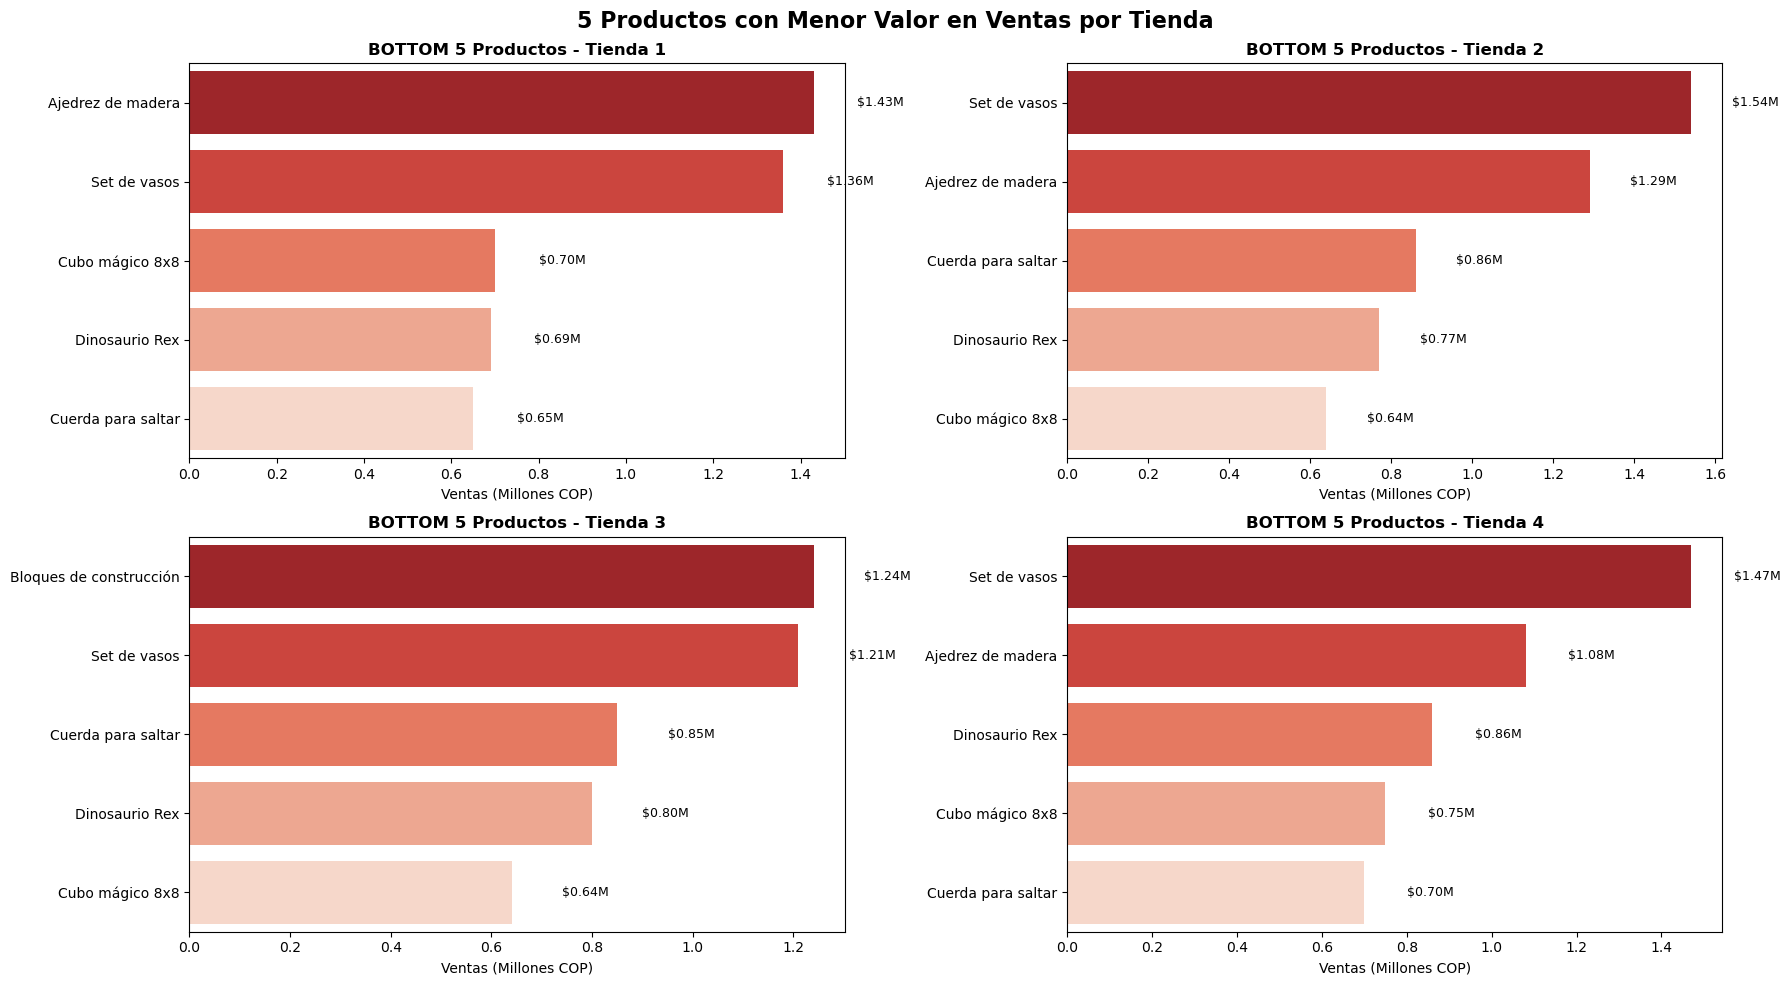

In [40]:
# FIGURA 1: SOLO TOP 5
fig1, axs1 = plt.subplots(2, 2, figsize=(18, 10))
axs1 = axs1.flatten()

for i, ((top_df, bottom_df), ax) in enumerate(zip(dfs_productos_completo, axs1), 1):
    sns.barplot(data=top_df, x='Ventas_Millones', y='Producto', 
                palette='viridis', ax=ax)

    ax.set_title(f'TOP 5 Productos - Tienda {i}', fontsize=12, fontweight='bold')
    ax.set_xlabel('Ventas (Millones COP)', fontsize=10)
    ax.set_ylabel('')
    
    for j, v in enumerate(top_df['Ventas_Millones']):
        ax.text(v + 0.1, j, f'${v:.2f}M', ha='left', va='center', fontsize=9)

plt.suptitle('TOP 5 Productos con Mayor Valor en Ventas por Tienda', 
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# FIGURA 2: SOLO BOTTOM 5
fig2, axs2 = plt.subplots(2, 2, figsize=(18, 10))
axs2 = axs2.flatten()

for i, ((top_df, bottom_df), ax) in enumerate(zip(dfs_productos_completo, axs2), 1):
    sns.barplot(data=bottom_df, x='Ventas_Millones', y='Producto', 
                palette='Reds_r', ax=ax)

    ax.set_title(f'BOTTOM 5 Productos - Tienda {i}', fontsize=12, fontweight='bold')
    ax.set_xlabel('Ventas (Millones COP)', fontsize=10)
    ax.set_ylabel('')
    
    for j, v in enumerate(bottom_df['Ventas_Millones']):
        ax.text(v + 0.1, j, f'${v:.2f}M', ha='left', va='center', fontsize=9)

plt.suptitle('5 Productos con Menor Valor en Ventas por Tienda', 
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

## Unidades de productos

In [41]:
def unidades_top_bottom_resume(df, name, top_n=5):
    """
    Calcula el top 5 y bottom 5 de productos por UNIDADES VENDIDAS
    """
    unidades = (df.groupby('Producto')
               .size()
               .reset_index(name='Unidades_Vendidas')
               .sort_values('Unidades_Vendidas', ascending=False))
    
    unidades.columns = ['Producto', 'Unidades_Vendidas']
    
    top5 = unidades.head(top_n)
    bottom5 = unidades.tail(top_n)
    
    return top5, bottom5

# Generar DataFrames para cada tienda
dfs_unidades_completo = [unidades_top_bottom_resume(tienda, f'tienda{i}') for i, tienda in enumerate(tiendas, 1)]

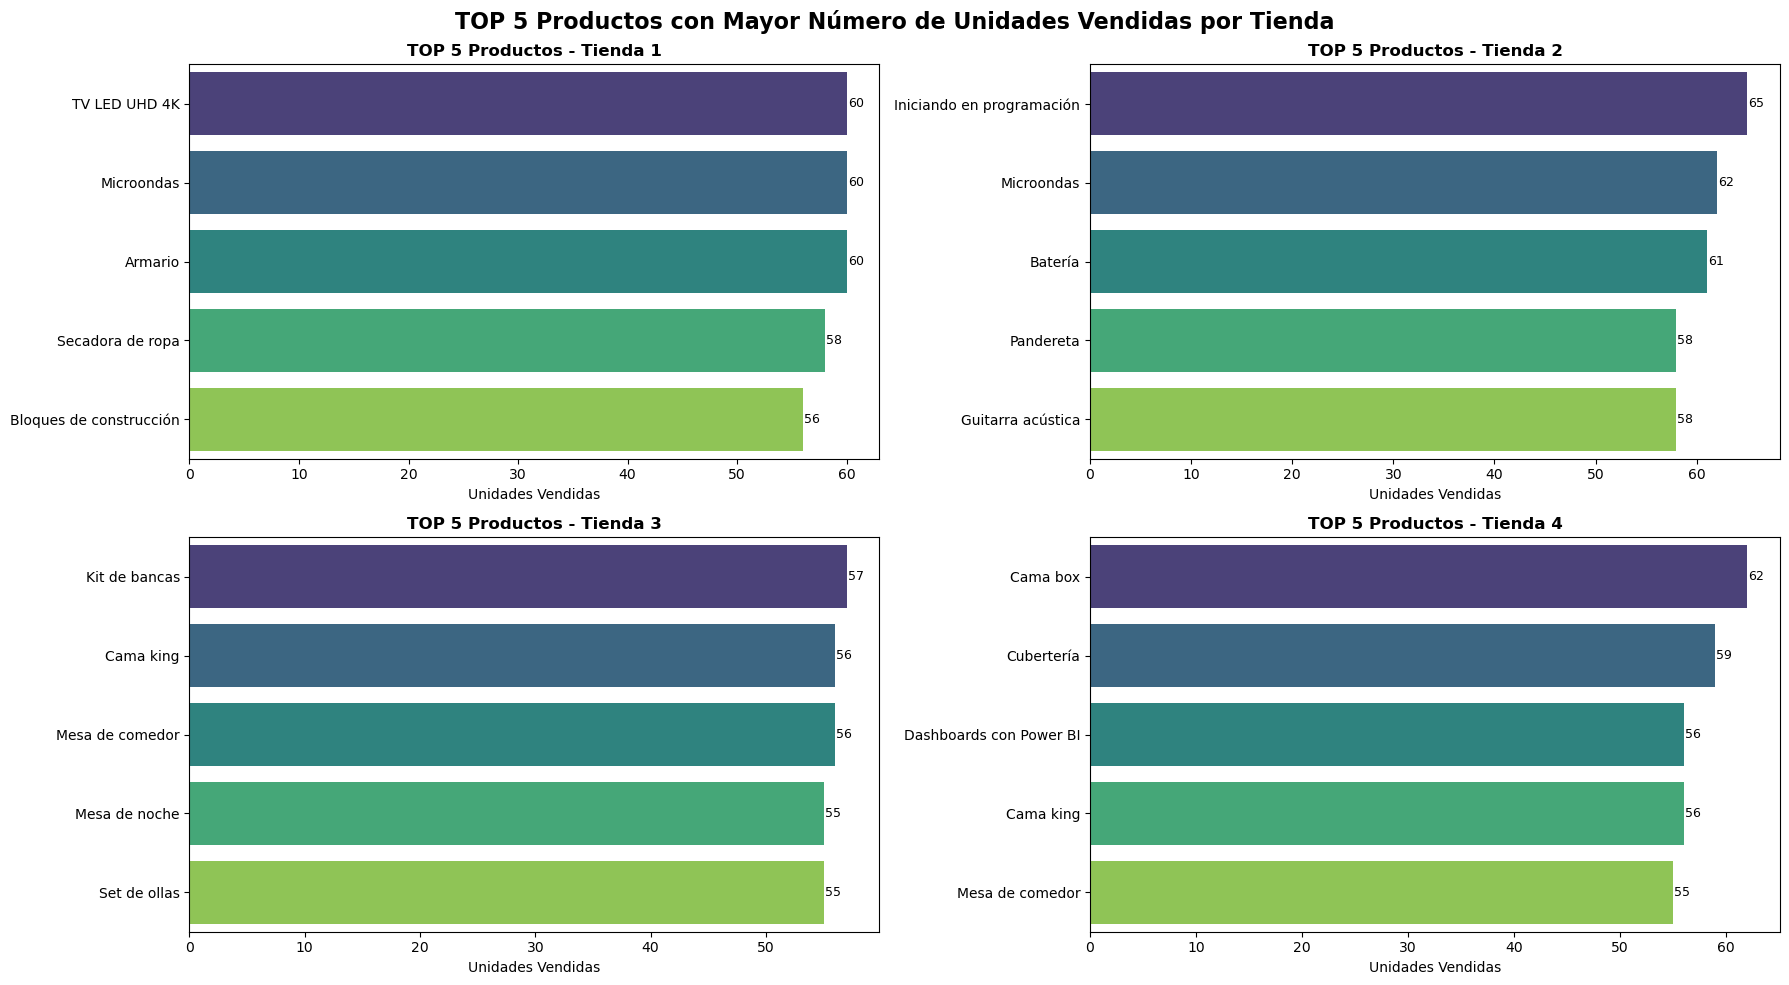

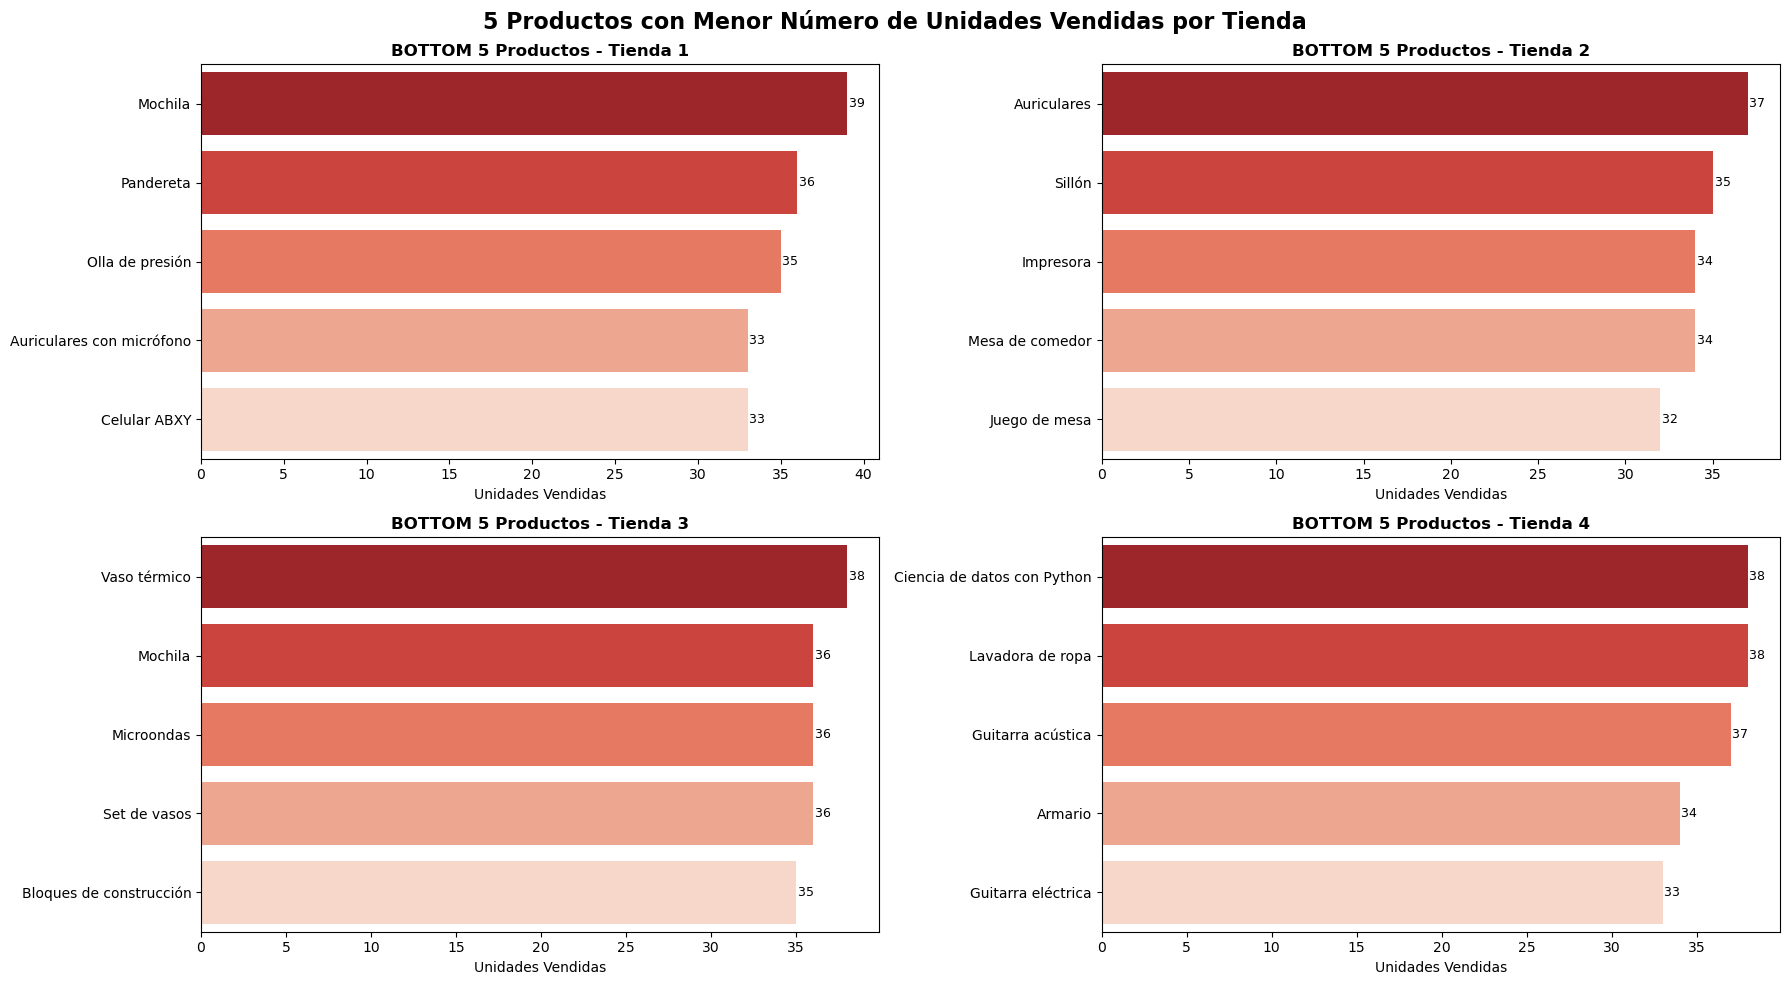

In [42]:
# FIGURA 1: SOLO TOP 5 (UNIDADES)
fig1, axs1 = plt.subplots(2, 2, figsize=(18, 10))
axs1 = axs1.flatten()

for i, ((top_df, bottom_df), ax) in enumerate(zip(dfs_unidades_completo, axs1), 1):
    sns.barplot(data=top_df, x='Unidades_Vendidas', y='Producto', 
                palette='viridis', ax=ax)

    ax.set_title(f'TOP 5 Productos - Tienda {i}', fontsize=12, fontweight='bold')
    ax.set_xlabel('Unidades Vendidas', fontsize=10)
    ax.set_ylabel('')
    
    for j, v in enumerate(top_df['Unidades_Vendidas']):
        ax.text(v + 0.1, j, f'{v:.0f}', ha='left', va='center', fontsize=9)

plt.suptitle('TOP 5 Productos con Mayor Número de Unidades Vendidas por Tienda', 
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# FIGURA 2: SOLO BOTTOM 5 (UNIDADES)
fig2, axs2 = plt.subplots(2, 2, figsize=(18, 10))
axs2 = axs2.flatten()

for i, ((top_df, bottom_df), ax) in enumerate(zip(dfs_unidades_completo, axs2), 1):
    sns.barplot(data=bottom_df, x='Unidades_Vendidas', y='Producto', 
                palette='Reds_r', ax=ax)

    ax.set_title(f'BOTTOM 5 Productos - Tienda {i}', fontsize=12, fontweight='bold')
    ax.set_xlabel('Unidades Vendidas', fontsize=10)
    ax.set_ylabel('')
    
    for j, v in enumerate(bottom_df['Unidades_Vendidas']):
        ax.text(v + 0.1, j, f'{v:.0f} ', ha='left', va='center', fontsize=9)

plt.suptitle('5 Productos con Menor Número de Unidades Vendidas por Tienda', 
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# 8. Envío promedio por tienda

In [43]:
EnvioPromedio = pd.DataFrame({
    'Tienda': [1, 2, 3, 4],
    'EnvioPromedio_Miles': [round(tienda['Costo de envío'].mean() / 1000, 2) for tienda in tiendas]
})
EnvioPromedio

,Tienda,EnvioPromedio_Miles
0,1,26.02
1,2,25.22
2,3,24.81
3,4,23.46


Como era de esperarse, el envio promedio por tienda no iba a diferir mucho.